# FROM SCRIPT TO SCREEN: WHAT MAKES BOX OFFICE HIT?

*Project by: GROUP 8*

1.Deborah Okeyo

2.Marion Macharia

3.David Chege

4.Evans Oyugi

# 1. Introduction

# 1.1 Overview

Applying exploratory data analysis to provide insights for a Microsoft stakeholder on which types of films to produce.

## 1.2 Business Understanding

*Objective*

The goal of this project is to use exploratory data analysis (EDA) to draw insights to aid the making of a new movie studio looking to enter the film industry and needs to determine which types of films are currently est performing at the box office. By analyzing various datasets related to movie performance. The objective is to identify trends and characteristics of successful films that can guide the studio’s content creation strategy.

*Business context*

With the evolution of film industry, understanding the market and consumer preferences is essential for new entrants. A new movie studio must leverage data-driven insights to make informed decisions about film production. The business wants to identify which factors contribute to box office success to maximize their investment and ensure their film offerings align with market demands.

# 2. Data Understanding

## 2.1 Data

The folder containing the data is called "zippedData" which contains movie datasets from:

1. Box Office Mojo- an online database providing detailed information on box office revenues

2. IMDB- a comprehensive database of movie and TV information

3. Rotten Tomatoes- a review aggregation website for films and TV shows

4. TheMovieDB- a community-driven movie and TV database

5. The Numbers- a database providing box office revenue information and other film metrics

The files are in different formats namely CSV and TSV files and can be opened using the pd.read_csv.
Data from IMDB is in a SQLite Database.

Data from the TSV files was not used because it didn't have the data neede for this analysis. Only the compressed CSV files and unzipped IMDB file were used.

Dataset used has 1001 rows and 10 columns. The columns are:

1. movie - name of film

2. runtime_minutes - total minutes of a film

3. genres - types of films

4. averagerating - average rating of individual films

5. production_budget - total production budget for the film

6. month - release month 

7. profit - total amount remaining production budget from total gross

8. original_language - film language

9. popularity - how popular a film is

10. year - release year 

In order to provide recommendations, this analysis will address the following questions:

1.What genres of films are performing best at the box office?

2.Which languages are most successful in terms of box office revenue?

3.How does the month of release impact profitability?

4.Is there a correlation between the duration of films and other factors?

## 2.2 Loading Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import shutil
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

## 2.3 Loading the Data

In [2]:
#Creating a connection
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [3]:
# Fetching table names
cur.execute(""" SELECT name FROM sqlite_master WHERE type='table';""")
tables = cur.fetchall()

In [4]:
# Loading csv datasets
budget_df = pd.read_csv("tn.movie_budgets.csv")
votes_df = pd.read_csv("tmdb.movies.csv", index_col=0)
gross_df = pd.read_csv("bom.movie_gross.csv")

#loading the sql tables datasets 
basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

## 2.4 Exploring the data

In [5]:
# the first 2 values in the budget dataset
budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# Information about the dataset i.e., number of rows and columns, column names, missing values and datatype
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
votes_df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
basics_df.shape

(146144, 6)

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Budget Dataset

In [12]:
# Datatypes of the dataset should be correct but first we need to know them
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
# Format the date into the pandas date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [14]:
# We want to operate on multiple columns hence put them in a list:
budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# pass them to df.replace(), specifying each char and it's replacement:
budget_df[budget_cols] = budget_df[budget_cols].replace({'\$': '', ',': ''}, regex=True)

In [15]:
# Convert the budget and gross columns into the integer datatype
budget_df[budget_cols] = budget_df[budget_cols].astype(np.int64)

In [16]:
# Checking to see if the values for the columns have been converted to the necessary datatypes
budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [17]:
# Checking for duplicates in the dataset
budget_df.duplicated().sum()

0

In [18]:
budget_df.duplicated(["movie","release_date"]).sum()

0

In [19]:
# Checking for missing values
budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Votes dataset

In [20]:
# We will look at the votes dataset as we did above with the budget dataset
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [21]:
# Format the date into the pandas date format
votes_df['release_date'] = pd.to_datetime(votes_df['release_date'])

In [22]:
# Checking for duplicates in the dataset
votes_df.duplicated().sum()

1020

In [23]:
# Remove the duplicates
votes_df.drop_duplicates(keep="first", inplace=True)

In [24]:
# Confirming that the duplicates have been removed
votes_df.duplicated().sum()

0

In [25]:
#Checking for duplicates in the title column
votes_df.duplicated(["title","release_date"]).sum()

7

In [26]:
votes_df.drop_duplicates(["title","release_date"], keep="first", inplace=True)

In [27]:
votes_df.duplicated(["title","release_date"]).sum()

0

In [28]:
# Checking for missing values
votes_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Gross dataset

In [29]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [30]:
gross_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
# removing the quotations and commas in the foreign gross column
gross_df["foreign_gross"] = gross_df["foreign_gross"].replace({"''": "", ",": ""}, regex=True)

In [32]:
# Changing the datatype from object to float
gross_df["foreign_gross"] = gross_df["foreign_gross"].astype(float)

In [33]:
# Checking for duplicates
gross_df.duplicated().sum()

0

In [34]:
# Check for duplicates in the title column
gross_df.duplicated(["title","year"]).sum()

0

In [35]:
# Check for missing values 
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

# Basics Dataset

In [36]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [37]:
basics_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
#Check for duplicates
basics_df.duplicated().sum()

0

In [39]:
# Check for duplicates in the primary title column
basics_df.duplicated(["primary_title","start_year"]).sum()

2072

In [40]:
# drop the duplicates in the primary title column
basics_df.drop_duplicates(["primary_title","start_year"], keep="first", inplace=True)

In [41]:
# Check for duplicates in the primary title column
basics_df.duplicated(["primary_title","start_year"]).sum()

0

In [42]:
# Check for missing values 
basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        18
start_year             0
runtime_minutes    31218
genres              5192
dtype: int64

In [43]:
# We will drop the original title column because there is a primary title column
basics_df = basics_df.drop('original_title', axis = 1)

In [44]:
# We will drop the rows with missing values in the genres column
basics_df = basics_df.dropna(subset=['genres'])

In [45]:
# Drop the rows with missing values in the runtime minutes column
basics_df = basics_df.dropna(subset=['runtime_minutes'])

In [46]:
# Check for any more missing values
basics_df.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

# Ratings Dataset

In [47]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [48]:
ratings_df.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [49]:
#Check for duplicates
ratings_df.duplicated().sum()

0

In [50]:
# Check for duplicates in the movie id column
ratings_df.duplicated(["movie_id"]).sum()

0

In [51]:
# Check for missing values in the ratings dataset
ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# 3.Merging Datasets

In [52]:
# Explore the new cleaned datsets so that we can know how to merge them
basics_df.head(5)

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy


In [53]:
# Merge the basics and ratings dataset using the movie id column
basics_and_ratings_df = basics_df.merge(ratings_df, on="movie_id", how="inner")

# Confirm the necessary columns are in the new dataset 
basics_and_ratings_df.head(5)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [54]:
# Merge the votes and gross dataset using the title column
votes_and_gross_df = votes_df.merge(gross_df, on="title", how="inner")

# Confirm the necessary columns are in the new dataset 
votes_and_gross_df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [55]:
# The only dataset not merged is the budget dataset so explore this again
budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [56]:
# Drop columns not needed in the exploratory analysis
# In the basics and ratings merged dataset we will drop the number of votes, movie id, start year
basics_and_ratings_df.drop(["numvotes","movie_id","start_year"], axis = 1, inplace = True)

In [57]:
# In the votes and gross merged dataset we will drop the original title and genre ids
votes_and_gross_df.drop(["genre_ids","original_title"], axis = 1, inplace = True)

In [58]:
# Check for duplicates in our merged datasets
basics_and_ratings_df.duplicated(["primary_title"]).sum()

2669

In [59]:
# We should drop the duplicates
basics_and_ratings_df.drop_duplicates(["primary_title"], keep='first', inplace=True)

In [60]:
# Check for duplicates 
votes_and_gross_df.duplicated(["title"]).sum()

155

In [61]:
# We should drop the duplicates
votes_and_gross_df.drop_duplicates(["title"], keep='first', inplace=True)

In [62]:
# Confirm if there are duplicates
votes_and_gross_df.duplicated(["title"]).sum()

0

We have no duplicates

In [63]:
#Now we add columns we want to work with using the columns we have
# 1. We will not add anything to the basics and ratings merged dataset
# 2. We can now drop the domestic gross, foreign gross and release dates column

votes_and_gross_df.drop(["domestic_gross","foreign_gross","release_date"], axis = 1, inplace = True)

# 3. We will add a column for total gross in the budget dataframe and another column for release month extracted 
#     from the release date
#    We will also add another column for profit

In [64]:
budget_df["total_gross"] = budget_df["domestic_gross"] + budget_df["worldwide_gross"] 

In [65]:
budget_df["month"] = budget_df["release_date"].dt.month

In [66]:
budget_df["profit"] = budget_df["total_gross"] - budget_df["production_budget"] 

In [67]:
# We can now drop the domestic gross, worldwide gross, id and release dates column
budget_df.drop(["domestic_gross","worldwide_gross","total_gross","release_date","id"], axis = 1, inplace = True)

In [68]:
# merge the basics and ratings dataset with the budget dataset
# 1. Change the primary title column in basics and ratings dataset to "movie"
basics_and_ratings_df.columns = ["movie","runtime_minutes","genres","averagerating"]
basics_and_ratings_df.head(5)

,movie,runtime_minutes,genres,averagerating
0,Sunghursh,175.0,"Action,Crime,Drama",7.0
1,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2
2,The Other Side of the Wind,122.0,Drama,6.9
3,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5
4,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1


In [69]:
# 2. Now merge the two datasets using the movie column
basics_and_budget_df = basics_and_ratings_df.merge(budget_df, on="movie", how="inner")
basics_and_budget_df.head(5)

,movie,runtime_minutes,genres,averagerating,production_budget,month,profit
0,Foodfight!,91.0,"Action,Animation,Comedy",1.9,45000000,12,-44926294
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,25000000,3,-14965870
2,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,91000000,12,155098021
3,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,28000000,9,60126272
4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,215000000,6,2086125489


In [70]:
# Drop the unneccessary columns
votes_and_gross_df.drop(["id","vote_average", "vote_count","studio"], axis = 1, inplace = True)

In [71]:
# merge the basics and budget dataset with the votes and gross dataset
# 1. Change the title column in votes and gross dataset to "movie"
votes_and_gross_df.columns = ["original_language","popularity","movie","year"]
votes_and_gross_df.head(5)

,original_language,popularity,movie,year
0,en,28.734,How to Train Your Dragon,2010
1,en,28.515,Iron Man 2,2010
2,en,27.920,Inception,2010
3,en,24.445,Toy Story 3,2010
4,en,23.673,Despicable Me,2010


In [72]:
# 2. Merge the two datasets into the final dataset using the movie column
movies = basics_and_budget_df.merge(votes_and_gross_df, on="movie", how="inner")
movies.head(5)

,movie,runtime_minutes,genres,averagerating,production_budget,month,profit,original_language,popularity,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,25000000,3,-14965870,en,8.919,2012
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,91000000,12,155098021,en,10.743,2013
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,28000000,9,60126272,en,19.373,2014
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,215000000,6,2086125489,en,20.709,2015
4,The Rum Diary,119.0,"Comedy,Drama",6.2,45000000,10,-10345453,en,12.011,2011


In [73]:
# Sort movies dataset by year from the most current year
movies_df = movies.sort_values('year', ascending=False)

# 4. Data Analysis

4.1 Genres

4.1.1 Most Profitable Genres

In [74]:
# Create a new dataset with the profit column arranged from highest to lowest
high_profit_genre = movies_df.sort_values('profit', ascending = False).head(250)

In [75]:
# Create an empty list
genre = []

# Split genres in the rows
for genres in high_profit_genre["genres"]:
    # split all
    genre.append(genres.split(','))

# Create another empty list
genres_list = []

#Accessing the individual genres in the rows
for i in genre:
    for item in i:
        genres_list.append(item)

# Count the number of films by genre
genres_sum = Counter(genres_list)

# Arrange them from the most common to least common
genres_sum.most_common()



[('Adventure', 149),
 ('Action', 127),
 ('Comedy', 88),
 ('Drama', 56),
 ('Animation', 53),
 ('Sci-Fi', 50),
 ('Thriller', 37),
 ('Fantasy', 25),
 ('Crime', 20),
 ('Mystery', 17),
 ('Family', 16),
 ('Biography', 15),
 ('Romance', 14),
 ('Horror', 12),
 ('Music', 4),
 ('History', 4),
 ('Sport', 3),
 ('Western', 2),
 ('Documentary', 1),
 ('Musical', 1)]

The top 5 most profitable genres are Adventure, Action, Comedy, Drama and Animation. This is visualized below using a bar chart.

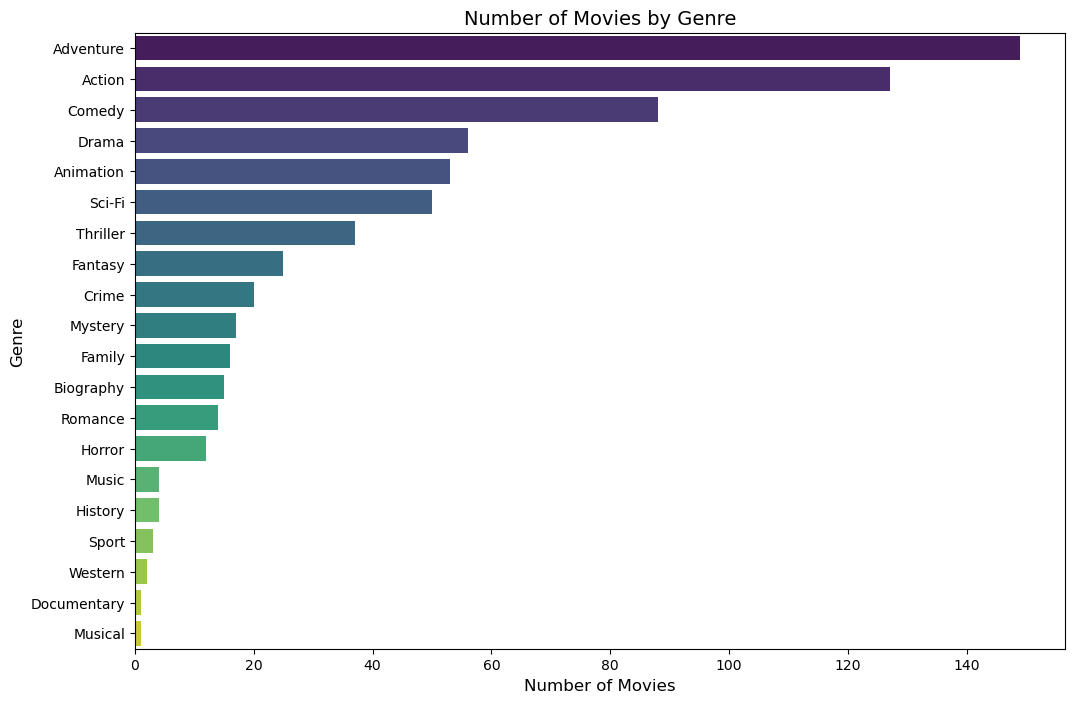

In [82]:


# Data preparation
data = [
    ('Adventure', 149),
    ('Action', 127),
    ('Comedy', 88),
    ('Drama', 56),
    ('Animation', 53),
    ('Sci-Fi', 50),
    ('Thriller', 37),
    ('Fantasy', 25),
    ('Crime', 20),
    ('Mystery', 17),
    ('Family', 16),
    ('Biography', 15),
    ('Romance', 14),
    ('Horror', 12),
    ('Music', 4),
    ('History', 4),
    ('Sport', 3),
    ('Western', 2),
    ('Documentary', 1),
    ('Musical', 1)
]

# Convert data into DataFrame
df = pd.DataFrame(data, columns=['Genre', 'Number_of_Movies'])

# Plot creation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Number_of_Movies', y='Genre', data=df, ax=ax, palette='viridis')

# Customizing the plot
ax.set_title('Number of Movies by Genre', fontsize=14)
ax.set_xlabel("Number of Movies", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)

# Save the plot
fig.savefig('Number_of_Movies_by_Genre.png')

# Show the plot
plt.show()


## 4.1.2 Highest Budget Genres

In [83]:
# Create a new dataset with the budget column arranged from highest to lowest
high_budget_genre = movies_df.sort_values('production_budget', ascending = False).head(250)

In [84]:
# Repeat the steps from the most profitable genres
genre = []

for genres in high_budget_genre["genres"]:
    genre.append(genres.split(','))
    
genres_list = []

for i in genre:
    for item in i:
        genres_list.append(item)
        
genres_sum = Counter(genres_list)

genres_sum.most_common()

[('Adventure', 187),
 ('Action', 157),
 ('Comedy', 80),
 ('Animation', 58),
 ('Sci-Fi', 52),
 ('Drama', 47),
 ('Fantasy', 41),
 ('Thriller', 27),
 ('Family', 26),
 ('Crime', 13),
 ('Mystery', 10),
 ('Horror', 5),
 ('Romance', 5),
 ('Biography', 4),
 ('History', 3),
 ('Western', 2),
 ('Sport', 1),
 ('Musical', 1),
 ('War', 1)]

The top 5 most highest budget genres are Adventure, Action, Comedy Animation and Sci-Fi. This is visualized below using a bar chart.

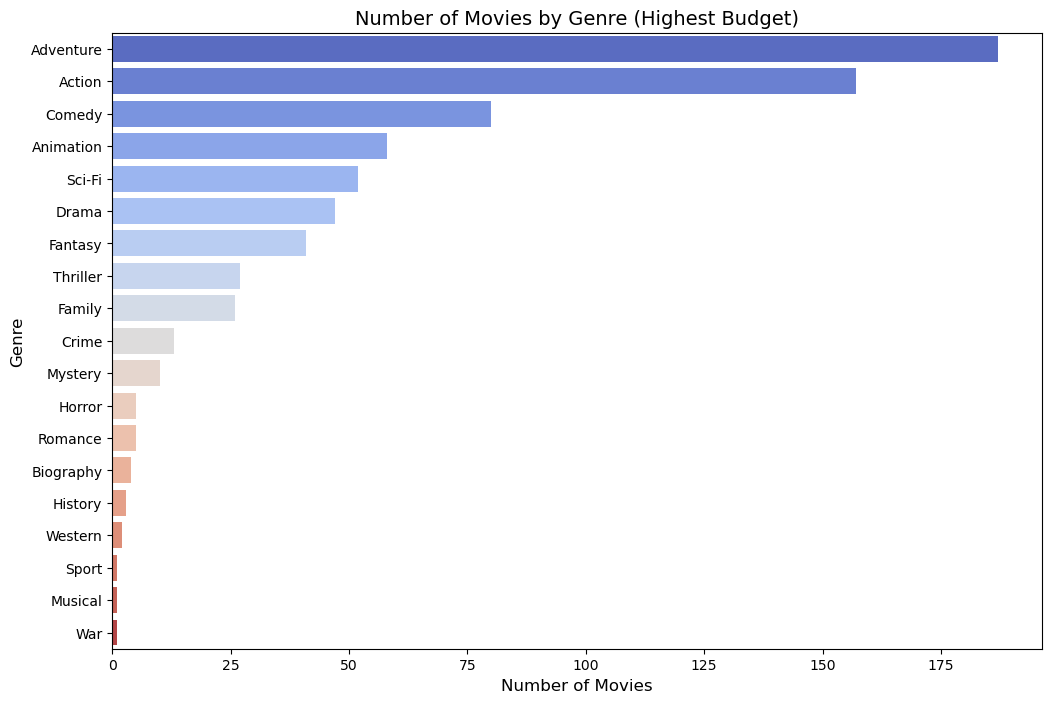

In [85]:


# Data preparation
data = [
    ('Adventure', 187),
    ('Action', 157),
    ('Comedy', 80),
    ('Animation', 58),
    ('Sci-Fi', 52),
    ('Drama', 47),
    ('Fantasy', 41),
    ('Thriller', 27),
    ('Family', 26),
    ('Crime', 13),
    ('Mystery', 10),
    ('Horror', 5),
    ('Romance', 5),
    ('Biography', 4),
    ('History', 3),
    ('Western', 2),
    ('Sport', 1),
    ('Musical', 1),
    ('War', 1)
]

# Convert data into DataFrame
df = pd.DataFrame(data, columns=['Genre', 'Number_of_Movies'])

# Plot creation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Number_of_Movies', y='Genre', data=df, ax=ax, palette='coolwarm')

# Customizing the plot
ax.set_title('Number of Movies by Genre (Highest Budget)', fontsize=14)
ax.set_xlabel("Number of Movies", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)

# Save the plot
fig.savefig('Highest_Budget_Genres.png')

# Show the plot
plt.show()


## 4.1.3 Most Popular Genres

In [86]:
# Create a new dataset with the popularity column arranged from highest to lowest
most_watched_genre = movies_df.sort_values('popularity', ascending = False).head(250)

In [87]:
genre = []

for genres in most_watched_genre["genres"]:
    # split all
    genre.append(genres.split(','))
    
genres_list = []

for i in genre:
    for item in i:
        genres_list.append(item)
        
genres_sum = Counter(genres_list)

genres_sum.most_common()

[('Action', 144),
 ('Adventure', 128),
 ('Drama', 74),
 ('Comedy', 59),
 ('Sci-Fi', 54),
 ('Thriller', 51),
 ('Crime', 38),
 ('Fantasy', 32),
 ('Animation', 29),
 ('Mystery', 27),
 ('Horror', 18),
 ('Biography', 17),
 ('Family', 14),
 ('Romance', 8),
 ('History', 5),
 ('Music', 3),
 ('Sport', 2),
 ('Documentary', 1),
 ('Musical', 1),
 ('Western', 1)]

The top 5 most popular genres are Action, Adventure, Drama, Comedy and Sci-Fi. This is visualized below using a bar chart.

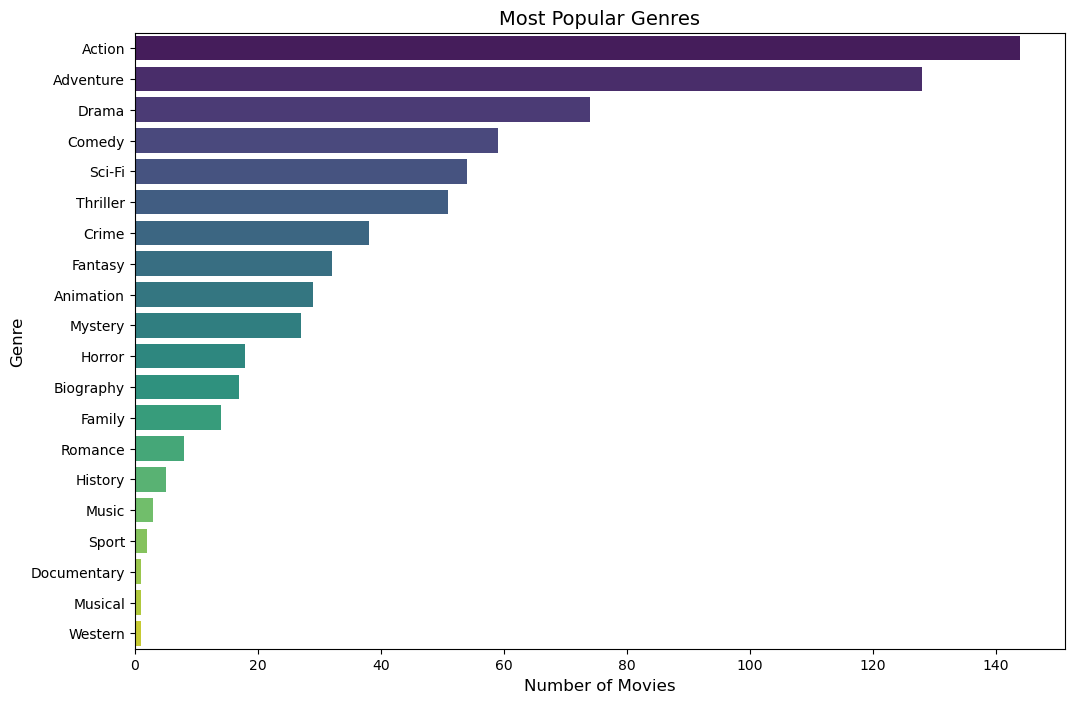

In [88]:


# Data preparation
data = [
    ('Action', 144),
    ('Adventure', 128),
    ('Drama', 74),
    ('Comedy', 59),
    ('Sci-Fi', 54),
    ('Thriller', 51),
    ('Crime', 38),
    ('Fantasy', 32),
    ('Animation', 29),
    ('Mystery', 27),
    ('Horror', 18),
    ('Biography', 17),
    ('Family', 14),
    ('Romance', 8),
    ('History', 5),
    ('Music', 3),
    ('Sport', 2),
    ('Documentary', 1),
    ('Musical', 1),
    ('Western', 1)
]

# Convert data into DataFrame
df = pd.DataFrame(data, columns=['Genre', 'Number_of_Movies'])

# Sort DataFrame by Number_of_Movies in descending order
df = df.sort_values(by='Number_of_Movies', ascending=False)

# Plot creation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Number_of_Movies', y='Genre', data=df, ax=ax, palette='viridis')

# Customizing the plot
ax.set_title('Most Popular Genres', fontsize=14)
ax.set_xlabel("Number of Movies", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)

# Save the plot
fig.savefig('Most_Popular_Genres.png')

# Show the plot
plt.show()
